In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('data/BA_reviews.csv')
df

,reviews
0,✅ Trip Verified | Despite being a gold member...
1,Not Verified | Regarding the aircraft and seat...
2,Not Verified | I travelled with British Airway...
3,Not Verified | Food was lousy. Who ever is pl...
4,✅ Trip Verified | Had the worst experience. Th...
...,...
3533,YYZ to LHR - July 2012 - I flew overnight in p...
3534,LHR to HAM. Purser addresses all club passenge...
3535,My son who had worked for British Airways urge...
3536,London City-New York JFK via Shannon on A318 b...


Cleaning data

In [3]:
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)
df.replace(re.compile(r'\s*Not Verified \|\s*'), '', inplace=True)

In [4]:
df['reviews'] = df['reviews'].str.lower()
df['reviews'] = df['reviews'].str.replace('[^\w\s]','')

/var/folders/c3/w39l5dyn6hjb4xfjk5t9lhq80000gn/T/ipykernel_5509/3646913256.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^\w\s]','')


In [5]:
df

,reviews
0,despite being a gold member the british airway...
1,regarding the aircraft and seat the business c...
2,i travelled with british airways from sweden t...
3,food was lousy who ever is planning the asian ...
4,had the worst experience the flight from londo...
...,...
3533,yyz to lhr july 2012 i flew overnight in pre...
3534,lhr to ham purser addresses all club passenger...
3535,my son who had worked for british airways urge...
3536,london citynew york jfk via shannon on a318 bu...


Get insights

In [20]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import pandas as pd
import nltk
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
from collections import Counter

[nltk_data] Downloading package stopwords to /Users/tdoan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenize the review column

In [7]:
df['reviews'] = df.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)

In [8]:
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df.head(20))

                                              reviews
0   despite gold member british airways staff heat...
1   regarding aircraft seat business class seats f...
2   travelled british airways sweden los angeles v...
3   food lousy ever planning asian hindu vegetaria...
4   worst experience flight london toronto got del...
5   ground staff helpful felt like wanted rush us ...
6   second time ba premium economy newer aircraft ...
7   changed flights brussels london heathrow lax 4...
8   copenhagen chaotic ticket counter assignment h...
9   worst experience life trying deal customer ser...
10  due code sharing cathay pacific downgraded ba ...
11  lhr check quick first wing quickly security fi...
12  wouldnt recommend british airways tried call c...
13  absolutely horrible experience booked ticket e...
14  worst airline one thing went right dont unders...
15  never fly british airways start plane 2 hours ...
16  worst aircraft ever flown seats cramped uncomf...
17  enjoyed flight boarding 

In [9]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [10]:
def sentiment_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'

In [11]:
df['polarity'] = df['reviews'].apply(polarity_calc)
df['sentiment'] = df['polarity'].apply(sentiment_cal)

In [12]:
df

,reviews,polarity,sentiment
0,despite gold member british airways staff heat...,0.061111,Positive
1,regarding aircraft seat business class seats f...,-0.016892,Negative
2,travelled british airways sweden los angeles v...,-0.064912,Negative
3,food lousy ever planning asian hindu vegetaria...,0.006250,Positive
4,worst experience flight london toronto got del...,-0.160000,Negative
...,...,...,...
3533,yyz lhr july 2012 flew overnight premium econo...,0.310000,Positive
3534,lhr ham purser addresses club passengers name ...,0.173214,Positive
3535,son worked british airways urged fly british a...,0.113542,Positive
3536,london citynew york jfk via shannon a318 reall...,0.340000,Positive


Analyze

In [26]:
df['sentiment'].value_counts()

Positive    2524
Negative     992
Neutral       22
Name: sentiment, dtype: int64

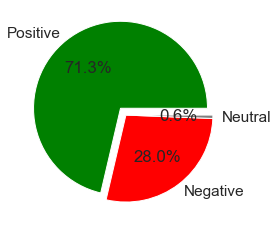

In [19]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = df['sentiment'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

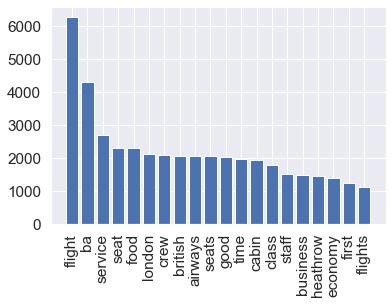

In [21]:
reviews = df['reviews']

words = []
for review in reviews:
    words.extend(review.split())

stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

labels, values = zip(*top_20_words)

plt.bar(labels, values)
plt.xticks(rotation=90)
plt.show()

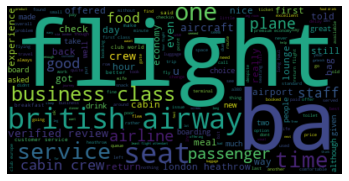

In [23]:
wordcloud = WordCloud(random_state=42).generate(' '.join(df['reviews']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()